by Akinde Kadjo

**The goal** here is to get the data into a concise form. Due to its large size (20 GB), the data won't be added to GitHub, but the original data set can be found [here.](https://www.kaggle.com/datasets/drscarlat/driams)

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os
from glob import glob
from tqdm import tqdm
from tqdm.keras import TqdmCallback
import time

# Functions

In [2]:
#extract all the files within the path/directory 
#then convert put them into a single dataframe
def ms_to_pd(folder_path):
    bin_list =[f'bin{i}' for i in range(6000)]
    id_list = []
    arr_list = []
    for i, filename in tqdm (list(enumerate(os.listdir(folder_path)))):
        file_path = os.path.join(folder_path, filename)
        #read only the second column
        arr = (pd.read_csv(file_path, sep=' ', usecols=[1])).values            
        arr = arr/np.max(arr) #normalize to 1            
        arr[arr<0.05] = 0 #remove 5% noise
        arr = np.ravel(arr)
        n_id = os.path.splitext(os.path.basename(filename))[0] #get filename
        #add to previous
        arr_list = arr_list +  [arr.tolist()]
        id_list = id_list + [n_id]
            
    #convert to dataframe
    arr_list = np.asarray(arr_list)
    bins = pd.DataFrame(arr_list, columns=bin_list, dtype= np.float16)
    ids = pd.DataFrame(id_list, columns=['id'])
    #final concat
    df = pd.concat([ids, bins], axis =1)
    return df

# Data Extraction

In [3]:
#converting the 2015 data into pd
df2015 = ms_to_pd('binned_6000/2015')
print(df2015.shape)

100%|██████████| 3198/3198 [00:26<00:00, 118.57it/s]


(3198, 6001)


In [4]:
#2016 data
df2016 = ms_to_pd('binned_6000/2016')
print(df2016.shape)

100%|██████████| 34868/34868 [20:39<00:00, 28.14it/s]   


(34868, 6001)


In [5]:
#2017 data
df2017 = ms_to_pd('binned_6000/2017')
print(df2017.shape)

100%|██████████| 43122/43122 [58:08<00:00, 12.36it/s]  


(43122, 6001)


In [6]:
#2018 data
df2018 = ms_to_pd('binned_6000/2018')
print(df2018.shape)

100%|██████████| 30069/30069 [38:15<00:00, 13.10it/s]  


(30069, 6001)


In [7]:
df2015.head(2)

,id,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,...,bin5990,bin5991,bin5992,bin5993,bin5994,bin5995,bin5996,bin5997,bin5998,bin5999
0,000d2b4a-ca7f-41c6-a9a2-968874ee9ce4,0.054779,0.082336,0.000000,0.069641,0.000000,0.000000,0.050995,0.0,0.057312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0014baec-4eb8-4a78-913a-99cc773b62b7,0.089478,0.000000,0.051636,0.098755,0.178955,0.101562,0.000000,0.0,0.081299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Visulalization

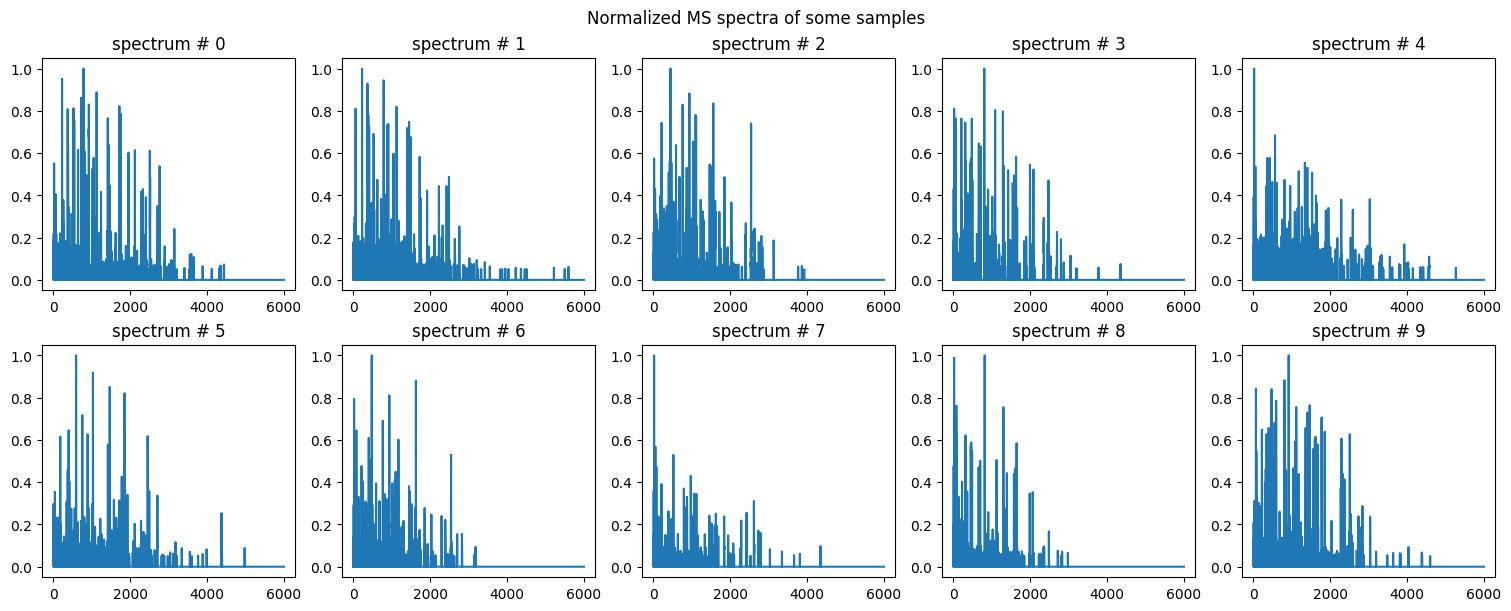

In [8]:
#let's plot the first 10 spectra
fig, axes = plt.subplots(2,5, figsize = (15, 6),constrained_layout=True)
fig.suptitle("Normalized MS spectra of some samples")
axes = axes.ravel()
for i in range(10):
    axes[i].plot(list(df2015.iloc[i][1:]))
    axes[i].set_title(f'spectrum # {i}')
plt.show()

# Saving the Data

In [9]:
df2015.to_csv('ms_2015.csv.gz', index=False, compression='gzip')

In [10]:
df2016.to_csv('ms_2016.csv.gz', index=False, compression='gzip')

In [11]:
df2017.to_csv('ms_2017.csv.gz', index=False, compression='gzip')

In [12]:
df2018.to_csv('ms_2018.csv.gz', index=False, compression='gzip')